<a href="https://colab.research.google.com/github/abirhazra/Reinforcement-Learning/blob/main/Q_Learning_(OpenAI%E2%80%99s_gym_environment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install gym

Mountain car environment

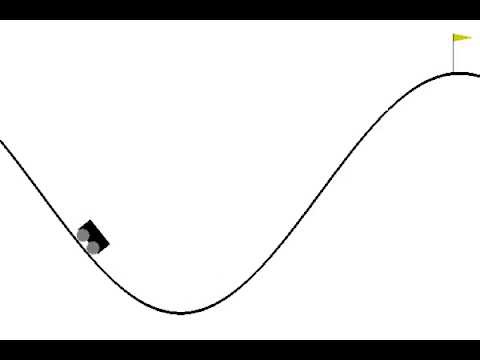

In [41]:
import gym
import numpy as np

env = gym.make("MountainCar-v0")

In [42]:
LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 2000
SHOW_EVERY = 300

In [43]:
DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)


In [44]:
q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

q_table

array([[[-1.61652334, -0.66366435, -1.11885017],
        [-0.1298916 , -1.45814234, -1.61626992],
        [-0.8478951 , -0.58015934, -0.75969498],
        ...,
        [-1.53885999, -0.28250027, -0.59639429],
        [-1.52715073, -1.70364945, -1.24852428],
        [-1.42520973, -0.89024492, -1.19632297]],

       [[-0.33031949, -0.26288587, -0.96159422],
        [-0.9651632 , -1.63508764, -1.97868126],
        [-1.08436064, -0.17522431, -0.37691756],
        ...,
        [-1.58608767, -0.25796703, -0.13151544],
        [-0.62257818, -1.0760845 , -1.01355103],
        [-0.71152338, -1.68828305, -0.47642927]],

       [[-1.44740866, -1.11137168, -1.81272914],
        [-0.65989302, -0.01980789, -0.25128208],
        [-0.24581594, -1.68047906, -0.73527647],
        ...,
        [-1.91453728, -0.74844919, -0.87260198],
        [-0.04888456, -0.87368933, -0.02629841],
        [-0.32422308, -1.671669  , -0.12945459]],

       ...,

       [[-0.22884295, -1.93576664, -1.01032976],
        [-0

In [45]:
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))  # we use this tuple to look up the 3 Q values for the available actions in the q-table

In [46]:
for episode in range(EPISODES):
    discrete_state = get_discrete_state(env.reset())
    done = False

    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False

    while not done:

        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)

        new_discrete_state = get_discrete_state(new_state)

        # if episode % SHOW_EVERY == 0:
        #     env.render()
        #new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

        # If simulation did not end yet after last step - update Q table
        if not done:

            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_discrete_state])

            # Current Q value (for current state and performed action)
            current_q = q_table[discrete_state + (action,)]

            # And here's our equation for a new Q value for current state and action
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = new_q


        # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            #q_table[discrete_state + (action,)] = reward
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value


env.close()

0
300
600
900
1200
1500
1800


In [47]:
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

In [59]:
STATS_EVERY = 100
LEARNING_RATE = 0.001

DISCOUNT = 0.95
EPISODES = 100000
SHOW_EVERY = 200

for episode in range(EPISODES):
    episode_reward = 0
    discrete_state = get_discrete_state(env.reset())
    done = False

    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False

    while not done:

        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        # if episode % SHOW_EVERY == 0:
        #     env.render()
        #new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

        # If simulation did not end yet after last step - update Q table
        if not done:

            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_discrete_state])

            # Current Q value (for current state and performed action)
            current_q = q_table[discrete_state + (action,)]

            # And here's our equation for a new Q value for current state and action
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = new_q


        # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            #q_table[discrete_state + (action,)] = reward
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
    ep_rewards.append(episode_reward)
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/STATS_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')
env.close()



0
Episode:     0, average reward: -153.5, current epsilon: -2.00
Episode:   100, average reward: -155.1, current epsilon: -2.10
200
Episode:   200, average reward: -155.3, current epsilon: -2.20
Episode:   300, average reward: -151.3, current epsilon: -2.30
400
Episode:   400, average reward: -149.7, current epsilon: -2.40
Episode:   500, average reward: -150.1, current epsilon: -2.50
600
Episode:   600, average reward: -148.4, current epsilon: -2.60
Episode:   700, average reward: -149.7, current epsilon: -2.70
800
Episode:   800, average reward: -146.7, current epsilon: -2.80
Episode:   900, average reward: -145.7, current epsilon: -2.90
1000
Episode:  1000, average reward: -148.3, current epsilon: -3.00
Episode:  1100, average reward: -161.6, current epsilon: -3.00
1200
Episode:  1200, average reward: -150.2, current epsilon: -3.00
Episode:  1300, average reward: -153.5, current epsilon: -3.00
1400
Episode:  1400, average reward: -151.7, current epsilon: -3.00
Episode:  1500, averag

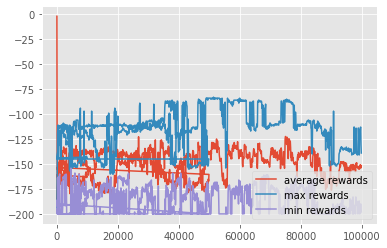

In [60]:
import matplotlib.pyplot as plt
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.show()

In [61]:
!pip install matplotlib

In [62]:
pip install mplot3d-dragger

In [63]:
pip install mpl-toolkits.clifford

In [55]:
!mkdir qtables

FileNotFoundError: ignored

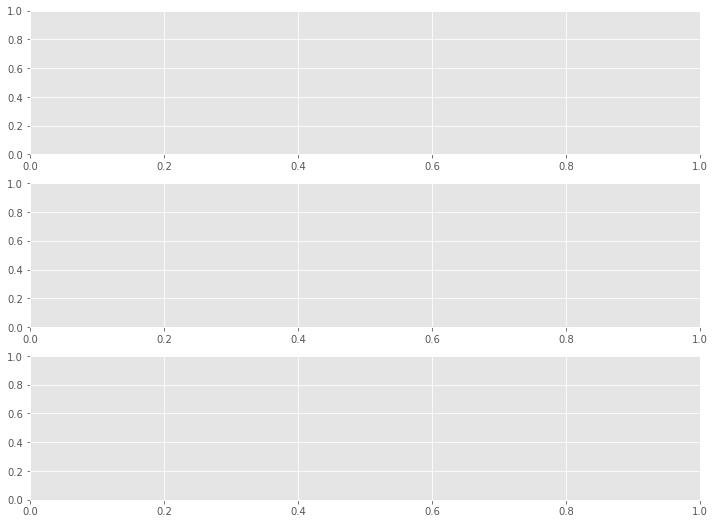

In [56]:


from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')


def get_q_color(value, vals):
    if value == max(vals):
        return "green", 1.0
    else:
        return "red", 0.3


fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

i = 24999
q_table = np.load(f"qtables/{i}-qtable.npy")


for x, x_vals in enumerate(q_table):
    for y, y_vals in enumerate(x_vals):
        ax1.scatter(x, y, c=get_q_color(y_vals[0], y_vals)[0], marker="o", alpha=get_q_color(y_vals[0], y_vals)[1])
        ax2.scatter(x, y, c=get_q_color(y_vals[1], y_vals)[0], marker="o", alpha=get_q_color(y_vals[1], y_vals)[1])
        ax3.scatter(x, y, c=get_q_color(y_vals[2], y_vals)[0], marker="o", alpha=get_q_color(y_vals[2], y_vals)[1])

        ax1.set_ylabel("Action 0")
        ax2.set_ylabel("Action 1")
        ax3.set_ylabel("Action 2")


plt.show()